In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#df.info()
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])


In [5]:
#df.info()


Let's remove the columns 'id' since they do not provide any value to the models.


In [6]:
df.drop(['id'], axis=1, inplace=True)
df.describe()
# Let's take a look at the updated DataFrame
#df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [7]:
Floors=df['floors'].value_counts().to_frame() 
print(Floors)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


In [8]:
df.corr()['price'].sort_values()


zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [9]:
df.describe()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


Importing Labreries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
waterfront=df['waterfront'].value_counts().to_frame() 
print(waterfront)

            count
waterfront       
0           21450
1             163


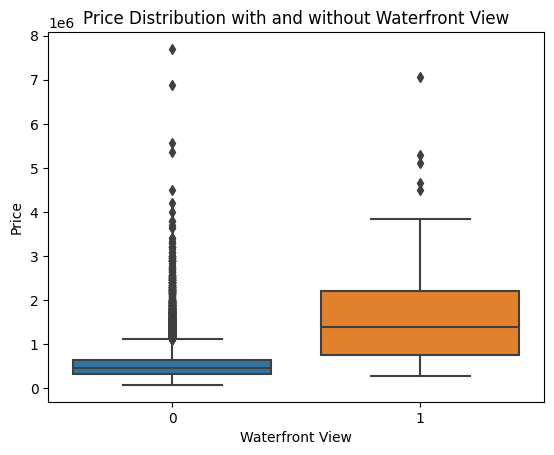

In [12]:
sns.boxplot(x=df['waterfront'], y=df['price'], data=df)

# Add title and labels
plt.title('Price Distribution with and without Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Price')

# Show plot
plt.show()

**scatter plot**<br>
show the relationship between 2 variables

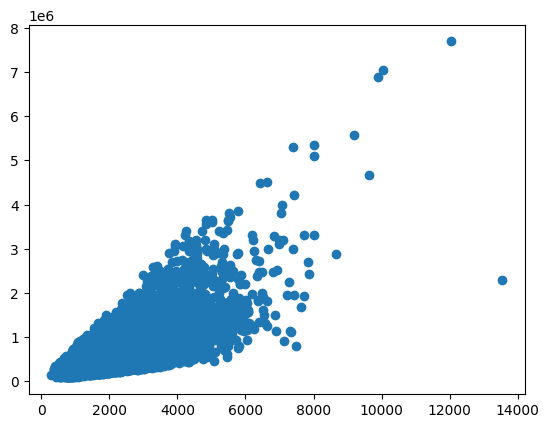

In [13]:
y=df['price']
x=df['sqft_living']
plt.scatter(x,y)

As we see, we have a stong(positive) correlation between price and sqft_living
We see this positive linear ralationship using **regplot**

(0.0, 8083988.508894991)

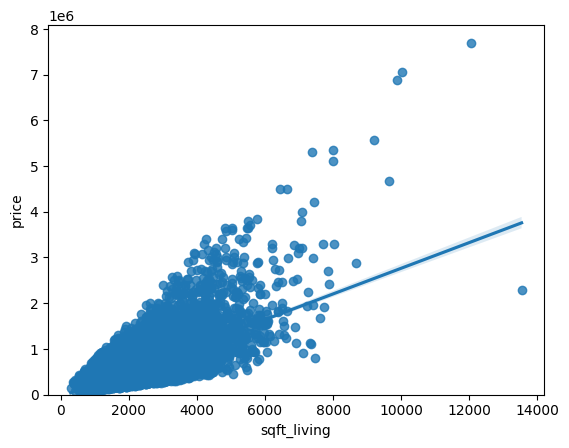

In [14]:
y=df['price']
x=df['sqft_living']
sns.regplot(x=x,y=y, data=df)
plt.ylim(0,)

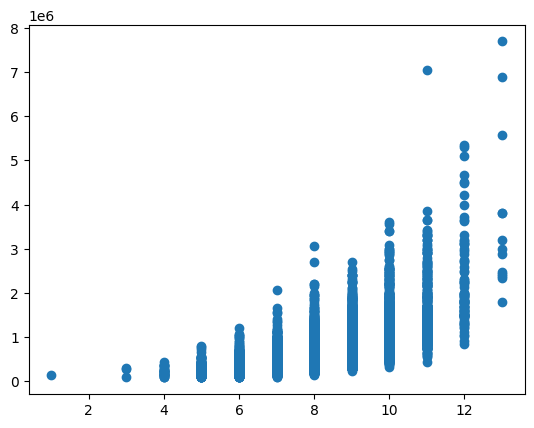

In [15]:
y=df['price']
x=df['grade']
plt.scatter(x,y)

**Pearson correclation**<br>
Strong correclation:<br>
correlation coefficient close 1 or -1
p-value less than 0.001

In [16]:
from scipy import stats
pearson_coef, p_value=stats.pearsonr(df['price'],df['sqft_living'])
print(pearson_coef)
print(p_value)



0.7020350546118
0.0


****Functions for Plotting****


Part 1: Training and Testing

An important step in testing the model is to split the data into training and testing data. We will place the target data **price** in a separate dataframe **y_data**


In [17]:
y_data = df['price']
#print(y_data)
#Drop price data in dataframe x_data:

x_data=df.drop('price',axis=1)
#print(x_data)

Now, we randomly split our data into training and testing data using the function **train_test_split**


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


**Fitting a sample linear model estimator:**

In [19]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['sqft_living']], y_train)
yhat=lre.predict(x_test[['sqft_living']])
print(lre.score(x_train[['sqft_living']], y_train))
lre.score(x_test[['sqft_living']], y_test)



0.4938445479924306


0.48489043226442774

We can obtain a predection:

In [20]:
yhat=lre.predict(x_test[['sqft_living']])
#print(yhat, x_test[['sqft_living']])

Let's calculate the R^2 on the test data:


In [21]:
lre.score(x_test[['sqft_living']], y_test)

0.48489043226442774

We can see the R^2 is smaller using the test data compared to the training data.


In [22]:
lre.score(x_train[['sqft_living']], y_train)

0.4938445479924306

In [23]:
lre=LinearRegression()
x_train=x_train[['sqft_living','floors','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade']]
x_test=x_test[['sqft_living','floors','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade']]
lre.fit(x_train, y_train)
yhat=lre.predict(x_test)
print(lre.score(x_train, y_train))
lre.score(x_test, y_test)

0.6440222892180858


0.6172408562283453

we observe that R^2 has been increased

**Pipeline**

We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two


Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('poly', PolynomialFeatures(degree=1)),  # Step 2: Perform polynomial transform
    ('regression', LinearRegression())  # Step 3: Fit a linear regression model
])

In [26]:
# Fit the pipeline object
pipeline.fit(x_train, y_train)
# Make predictions
y_pred = pipeline.predict(x_test)
# Calculate R^2
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.617240856228344


The Price is related to many feature, So the best solution is multiple lirear regression model

We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two

Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

In [27]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 14
    height = 14
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Houses')
    plt.show()
    plt.close()

In [28]:
#sns.kdeplot(y_test, color='r',label='Actuals')
#sns.kdeplot(yhat_test1, color='b', label='Predictions')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


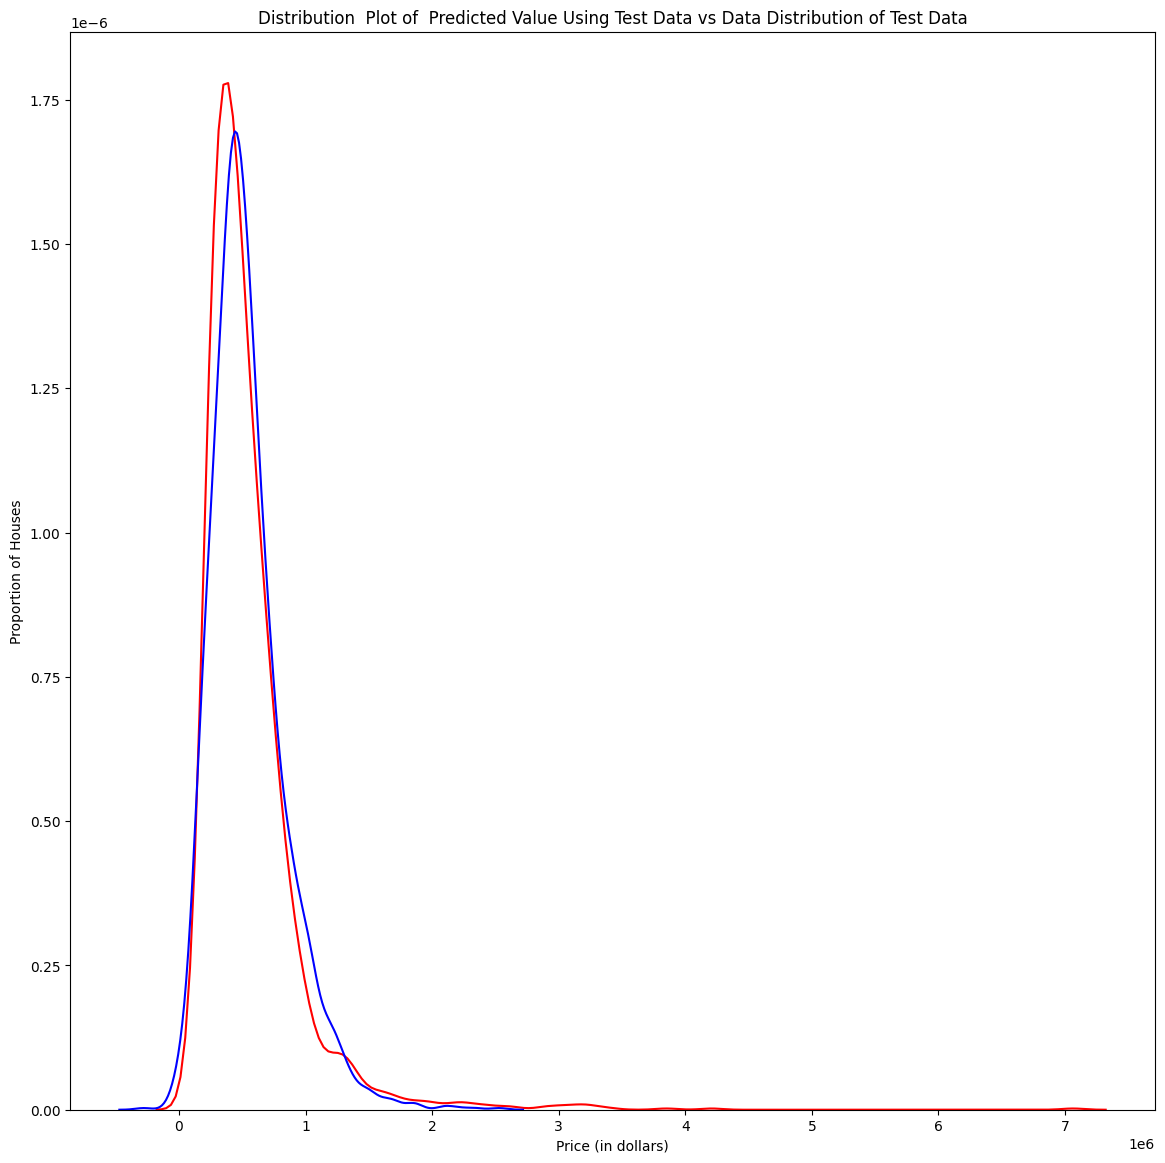

In [29]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for houses where the price less $1,000,000 

**** Ridge Regression****

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [30]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [31]:
RigeModel=Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [32]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

Similarly, you can obtain a prediction:


In [33]:
yhat = RigeModel.predict(x_test)

In [34]:
print(r2_score(yhat, y_test))

0.303495187905763


polynomial degree=2

In [35]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr1.fit_transform(x_train)
x_test_pr1=pr1.fit_transform(x_test)
RigeModel.fit(x_train_pr1, y_train)
yhat2 = RigeModel.predict(x_test_pr1)
r_squared = r2_score(y_test, yhat2)
print("R^2 score:", r_squared)


R^2 score: 0.6890328209409049


Let's compare the first five predicted samples to our test set:


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


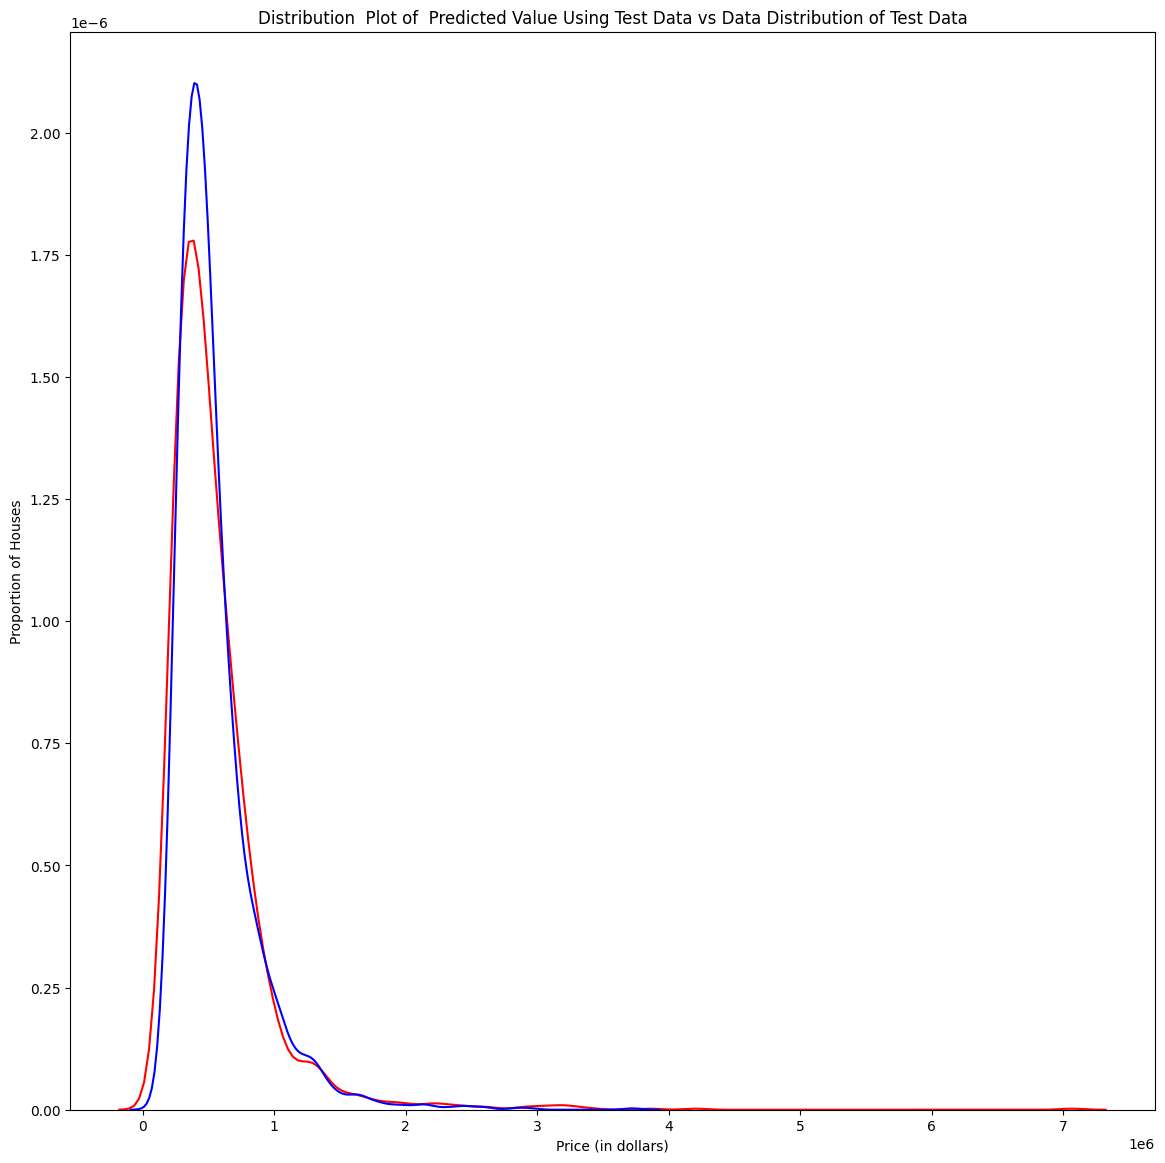

In [36]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat2, "Actual Values (Test)", "Predicted Values (Test)", Title)